# وَأَن لَّيْسَ لِلْإِنسَانِ إِلَّا مَا سَعَىٰ (39) وَأَنَّ سَعْيَهُ سَوْفَ يُرَىٰ (40) ثُمَّ يُجْزَاهُ الْجَزَاءَ الْأَوْفَىٰ 


In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler



In [30]:
file=pd.read_csv(r"C:\Users\User.DESKTOP-OQ6NE4T\Desktop\End_Projects\EcommerceCustomers\EcommerceCustomers.csv")
file

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [31]:
file.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [32]:
file.drop("Email",inplace=True,axis='columns')


In [33]:
file.drop("Address",inplace=True,axis='columns')

In [34]:

#file = pd.get_dummies(file, drop_first=1)
file

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [35]:
#correlation = file.corr()
#print(correlation["Yearly Amount Spent"].sort_values(ascending=False))
file.drop("Avatar",inplace=True,axis='columns')

In [36]:
# normalization
file['Avg. Session Length'] = (file['Avg. Session Length'] - file['Avg. Session Length'].min()) / (file['Avg. Session Length'].max() - file['Avg. Session Length'].min())
file['Time on App'] = (file['Time on App'] - file['Time on App'].min()) / (file['Time on App'].max() - file['Time on App'].min())
file['Length of Membership'] = (file['Length of Membership'] - file['Length of Membership'].min()) / (file['Length of Membership'].max() - file['Length of Membership'].min())




In [37]:
numeric=file


<Axes: >

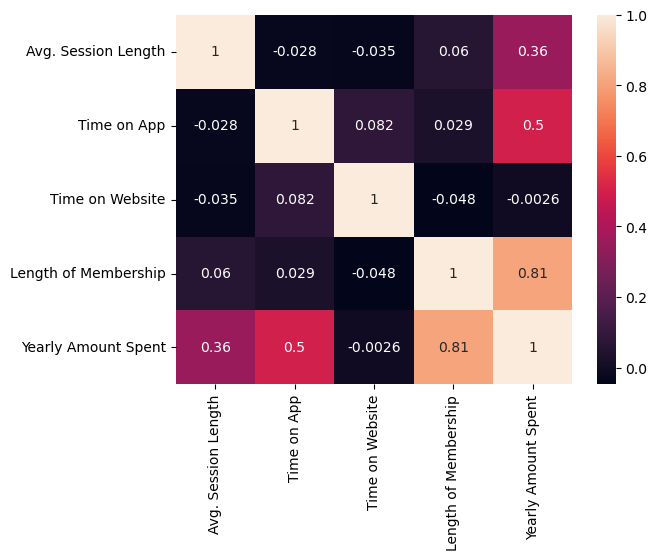

In [38]:
sns.heatmap(numeric.corr(),annot=True)

In [39]:
file.drop('Time on Website',inplace=True,axis='columns')


In [40]:
features=pd.DataFrame(file,columns=['Avg. Session Length','Time on App', 'Length of Membership'])
labels=file["Yearly Amount Spent"].values.reshape(-1,1)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.8,random_state=100)


In [42]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [43]:
print(model_1.coef_)
print(model_1.intercept_)

[[183.64896005 261.03102041 410.4568221 ]]
[60.0880702]


In [44]:
y_prediction=model_1.predict(x_test)

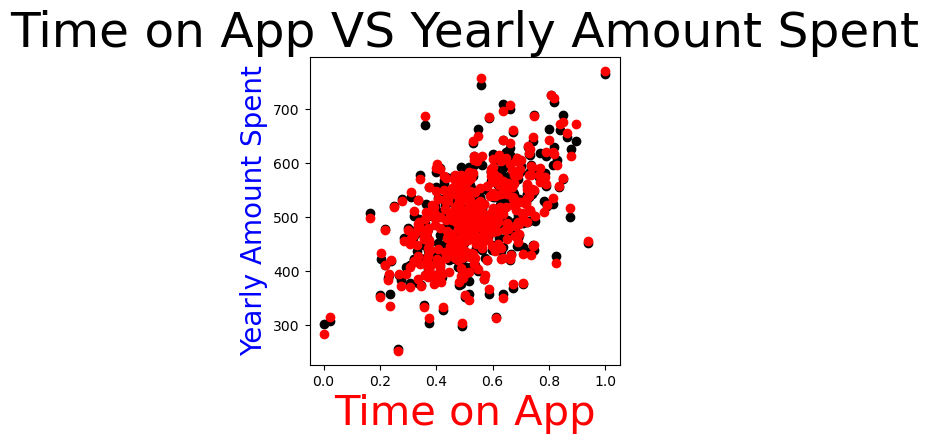

In [45]:
plt.figure(figsize=(4,4),dpi=100)
a=x_test['Time on App']
b=y_test
c=x_test['Time on App']
d=y_prediction
plt.title("Time on App VS Yearly Amount Spent",size=35,c="black")
plt.xlabel("Time on App",size=30,c="red")
plt.ylabel("Yearly Amount Spent",size=20,c="blue")
plt.scatter(a,b, c= 'black')
plt.scatter(c,d, c= 'red')
plt.show()

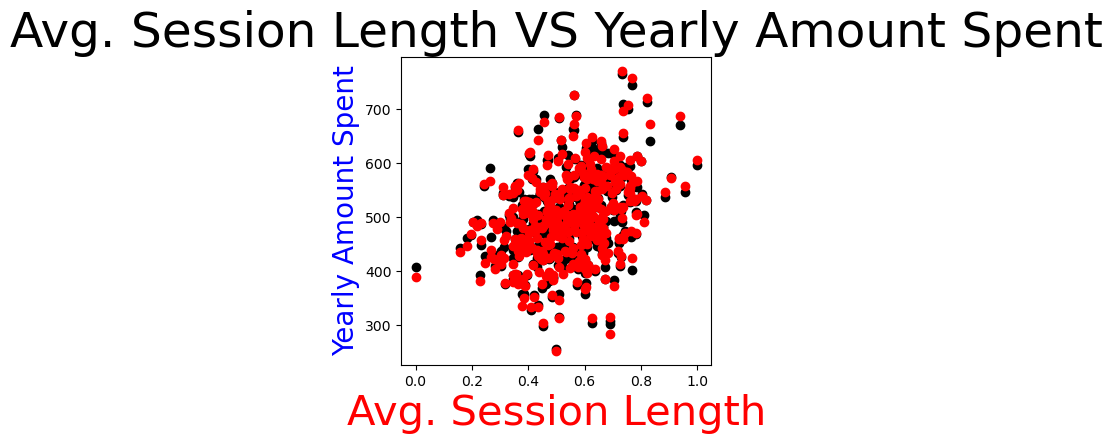

In [46]:
plt.figure(figsize=(4,4),dpi=100)
a=x_test['Avg. Session Length']
b=y_test
c=x_test['Avg. Session Length']
d=y_prediction
plt.title("Avg. Session Length VS Yearly Amount Spent",size=35,c="black")
plt.xlabel("Avg. Session Length",size=30,c="red")
plt.ylabel("Yearly Amount Spent",size=20,c="blue")
plt.scatter(a,b, c= 'black')
plt.scatter(c,d, c= 'red')
plt.show()

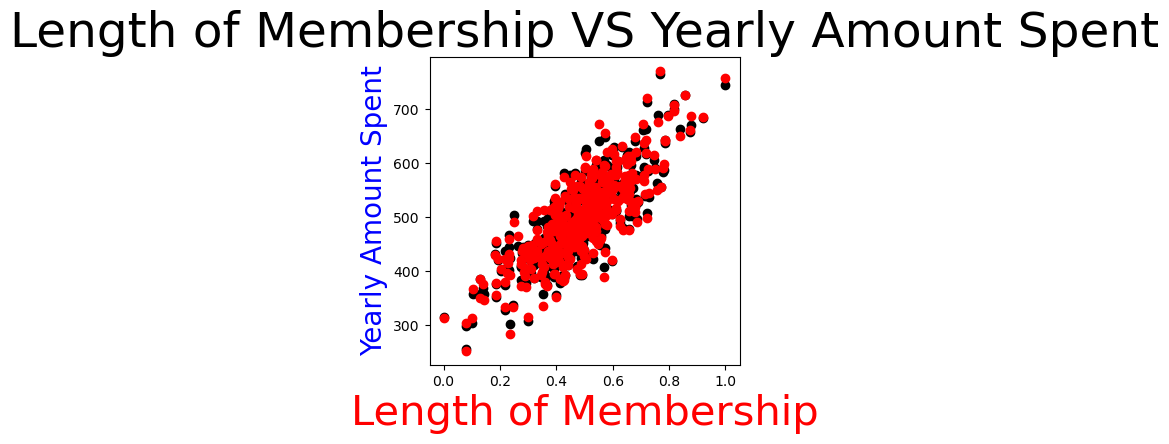

In [47]:
plt.figure(figsize=(4,4),dpi=100)
a=x_test['Length of Membership']
b=y_test
c=x_test['Length of Membership']
d=y_prediction
plt.title("Length of Membership VS Yearly Amount Spent",size=35,c="black")
plt.xlabel("Length of Membership",size=30,c="red")
plt.ylabel("Yearly Amount Spent",size=20,c="blue")
plt.scatter(a,b, c= 'black')
plt.scatter(c,d, c= 'red')
plt.show()

In [48]:
metrics.mean_squared_error(y_test, y_prediction)
np.sqrt(metrics.mean_squared_error(y_test, y_prediction))

10.446190685656232

In [49]:
file

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,0.751425,0.626620,0.573101,587.951054
1,0.362306,0.393016,0.359869,392.204933
2,0.524953,0.426378,0.576396,487.547505
3,0.722409,0.787050,0.428434,581.852344
4,0.574861,0.647702,0.627768,599.406092
...,...,...,...,...
495,0.560784,0.764183,0.522589,573.847438
496,0.782491,0.481592,0.497028,529.049004
497,0.471354,0.451931,0.704722,551.620145
498,0.573625,0.586699,0.310634,456.469510


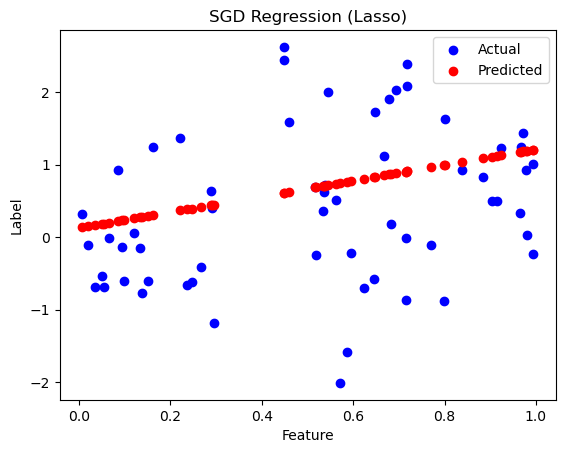

Model Coefficients: [0.32283077]
Model Intercept: [0.67321327]


In [50]:
## Apply Gradirnt Decent

features = np.random.rand(100, 1)
labels = features + np.random.randn(100, 1)
labels = labels.ravel()  # Convert to (100,)

# Split data AFTER defining features and labels
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.6, random_state=100)

# Feature scaling (important for SGD)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train SGD Regressor (Lasso Regularization)
model_1 = SGDRegressor(alpha=0.01, penalty='l1', random_state=100)
model_1.fit(x_train_scaled, y_train)

# Predict
y_pred = model_1.predict(x_test_scaled)

# Plotting
plt.scatter(x_test, y_test, color="blue", label="Actual")  # Ensure shapes match
plt.scatter(x_test, y_pred, color="red", label="Predicted")
plt.legend()
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("SGD Regression (Lasso)")
plt.show()

# Print coefficients and intercept
print("Model Coefficients:", model_1.coef_)  
print("Model Intercept:", model_1.intercept_)

